In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from skntk import NeuralTangentKernel as NTK
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\hindi_data.csv')

In [3]:
data.head()

,text,sentiment
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [4]:
data.dropna(inplace=True)

In [5]:
def preprocess_and_clean_hindi(text):
    # Define the function to preprocess Hindi text by tokenizing
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens

    # Define the function to remove non-Hindi characters while preserving spaces
    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    # Tokenize the text
    tokens = preprocess_text_hindi(text)

    # Remove non-Hindi characters while preserving spaces
    cleaned_text = ' '.join([remove_non_hindi(token) for token in tokens])

    return cleaned_text

data['text'] = data['text'].apply(preprocess_and_clean_hindi)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})


In [6]:
data = data[data['label'] != 2]

In [7]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_ngram = ngram_vectorizer.fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(X_ngram, data['label'], test_size=0.2, random_state=42)


In [8]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       208
           1       0.66      0.80      0.72       208

    accuracy                           0.69       416
   macro avg       0.70      0.69      0.69       416
weighted avg       0.70      0.69      0.69       416



In [9]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.60       208
           1       0.62      0.82      0.71       208

    accuracy                           0.66       416
   macro avg       0.68      0.66      0.65       416
weighted avg       0.68      0.66      0.65       416



In [10]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       208
           1       0.64      0.76      0.70       208

    accuracy                           0.67       416
   macro avg       0.68      0.67      0.67       416
weighted avg       0.68      0.67      0.67       416



In [18]:
# Get the best model based on the accuracy score 

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

best_model = max(accuracy_svm, accuracy_rf, accuracy_xgb)

0.6923076923076923 0.6610576923076923 0.6706730769230769


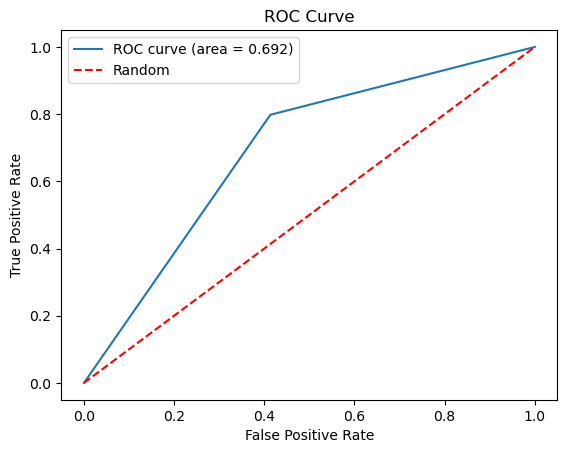

In [19]:
# Get the ROC AUC score for the best model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the ROC curve for the best model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

# Add the random line
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')

# Set the title and labels
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Add the legend
ax.legend()

# Show the plot
plt.show()